<i style= 'color: green; font-size:1.5em'> Pamela Jaramillo
<!---line--->
<i style= 'color: green; font-size:1em'> Práctica 2

# Ejercicio de machine learning: clasificación y regresión vinícola

En este ejercicio (mucho menos guiado que los anteriores) vas a tener dos objetivos. Para ello, utilizarás un dataset sobre distintos vinos con sus características (como pueden ser la acidez, densidad...). Tendrás que generar, entrenar, validar y testear modelos tanto de clasificación como de regresión.

El dataset proviene de la Universdad de Minho, generado por [P. Cortez](http://www3.dsi.uminho.pt/pcortez/Home.html) et al. Dicho dataset se encuentra en el [*UC Irvine Machine Learning Repository*](https://archive.ics.uci.edu/ml/index.html) ([aquí](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) está disponible; pero debes usar la versión adjunta en la misma carpeta que este documento). Adjunto la descripción del dataset:

```
Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None
```

Además de las 12 variables descritas, el dataset que utilizarás tiene otra: si el vino es blanco o rojo. Dicho esto, los objetivos son:

1. Separar el dataset en training (+ validación si no vas a hacer validación cruzada) y testing, haciendo antes (o después) las transformaciones de los datos que consideres oportunas, así como selección de variables, reducción de dimensionalidad... Puede que decidas usar los datos tal cual vienen también...
2. Hacer un modelo capaz de clasificar lo mejor posible si un vino es blanco o rojo a partir del resto de variables (vas a ver que está chupado conseguir un muy buen resultado).
3. Hacer un modelo regresor que prediga lo mejor posible la calidad de los vinos.

El fichero csv a utilizar `winequality.csv` tiene las cabeceras de cuál es cada variable, y los datos están separados por punto y coma.

Siéntete libre de hacer todo el análisis exploratorio y estadístico (así como gráficos) que quieras antes de lanzarte a hacer modelos.

Y nada más. ¡Ánimo!

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from math import sqrt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import pickle

#______________MODELOS DE CLASIFICACIÓN__________________
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.neural_network import MLPClassifier as MLP


from sklearn.model_selection import GridSearchCV as GSC


#______________MÉTRICAS DE CLASIFICACIÓN__________________

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

############## MODELOS DE REGRESIÓN ##########################


from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LRR #para no confundirla con la LR de clasificación
from sklearn.linear_model import Ridge ## Regularización L2
from sklearn.linear_model import Lasso  ## Regularización L1
from sklearn.linear_model import ElasticNet ## Regularización L1 + L2
from sklearn.tree import DecisionTreeRegressor as DTR #árbol regresor
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.neural_network import MLPRegressor as MLPR

#______________MÉTRICAS DE REGRESIÓN_______________________


from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

#TRATO DE VARIABLES CATEGÓRICAS
from sklearn.preprocessing import LabelBinarizer
from sklearn.compose import make_column_transformer


#GRAFICOS
import seaborn as sns
import pandas_profiling
from prettytable import PrettyTable


#PIPELINE
from sklearn.pipeline import Pipeline

#FEATURE SELECTION
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
random_state=1987

In [2]:
#FUNCIONES
def metricas(modelo,x,y):
    print('Accuracy: %s'%(round(((modelo.score(x,y))*100),2)))
    print('   Acierto un %s%% de veces'%(round(((modelo.score(x,y))*100),2)))
    print("Recall: %s" %(round(((recall_score(y_pred=modelo.predict(x),y_true =y))*100),2)))
    print("   Capto el %s%% de vino blanco" %(round(((recall_score(y_pred=modelo.predict(x),y_true =y))*100),2)))
    print("Precisión: %s" %(round(((precision_score(y_pred=modelo.predict(x),y_true =y))*100),2)))
    print("   Cuando predigo vino blanco lo hago con un %s%% de probabilidad" %(round(((precision_score(y_pred=modelo.predict(x),y_true =y))*100),2)))      
    print('\n')
    print('Matriz de confusión')
    confusion=confusion_matrix(y_true=y, y_pred=modelo.predict(x))
    print(confusion)
    print('Predigo %s veces que es blanco cuando es rojo y predigo %s veces que es rojo cuando es blanco' %(confusion[0,1],
                                                                                                       confusion[1,0]))
    
def prettytable(modelo1,modelo2,modelo3,x,y,lista):
    t = PrettyTable(lista)
    t.add_row(['Accuracy',round(((modelo1.score(x,y))*100),2),
           round(((modelo2.score(x,y))*100),2),
          round(((modelo3.score(x,y))*100),2)])
    t.add_row(['Recall', round(((recall_score(y_pred=modelo1.predict(x),y_true =y))*100),2),
          round(((recall_score(y_pred=modelo2.predict(x),y_true =y))*100),2),
          round(((recall_score(y_pred=modelo3.predict(x),y_true =y))*100),2)])
    t.add_row(['Precision', round(((precision_score(y_pred=modelo1.predict(x),y_true =y))*100),2),
          round(((precision_score(y_pred=modelo2.predict(x),y_true =y))*100),2),
          round(((precision_score(y_pred=modelo3.predict(x),y_true =y))*100),2)])
    return t
    
def report_met(modelo, x,y):
    y_true = y
    y_pred = modelo.predict(x)
    target_names = ['Vino Rojo','Vino Blanco']
    print(classification_report(y_true, y_pred, target_names=target_names))
    
def metricas_reg(modelo,x,y):
    red=np.round(modelo.best_estimator_.predict(x),0)
    R2=round(r2(y_pred=red,y_true=y),3)
    MAE=round((mae(y_pred=red,y_true=y)),3)
    RMSE=round(np.sqrt(mse(y_pred=red,y_true=y)),3)
    print('R2:%s,MAE:%s,RMSE:%s'%(R2,MAE,RMSE))

<a style='color:blue'> ANÁLISIS DE DATOS

In [3]:
#DATAFRAME
df_wine1 = pd.read_csv ('winequality.csv',sep=';', delimiter=None, header=0)
df_wine1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white


In [4]:
#Reporte variables adjunto
report=pandas_profiling.ProfileReport(df_wine1)
report.to_file('profile_report.html')

<a style= 'color:green'> 
<!---blank line--->
CONCLUSIONES
 - En el reporte adjunto vemos que hay 1177 lineas duplicadas. Procederemos a eliminarlas para que no distorsionen la predicción.
 - Encontramos también presencia de outliers en algunas variables.

In [5]:
df_wine=df_wine1.copy()

In [6]:
df_wine.drop_duplicates(inplace=True)

In [7]:
report=pandas_profiling.ProfileReport(df_wine)
report.to_file('profile_report2.html')

<a style='color:blue'> GRÁFICOS

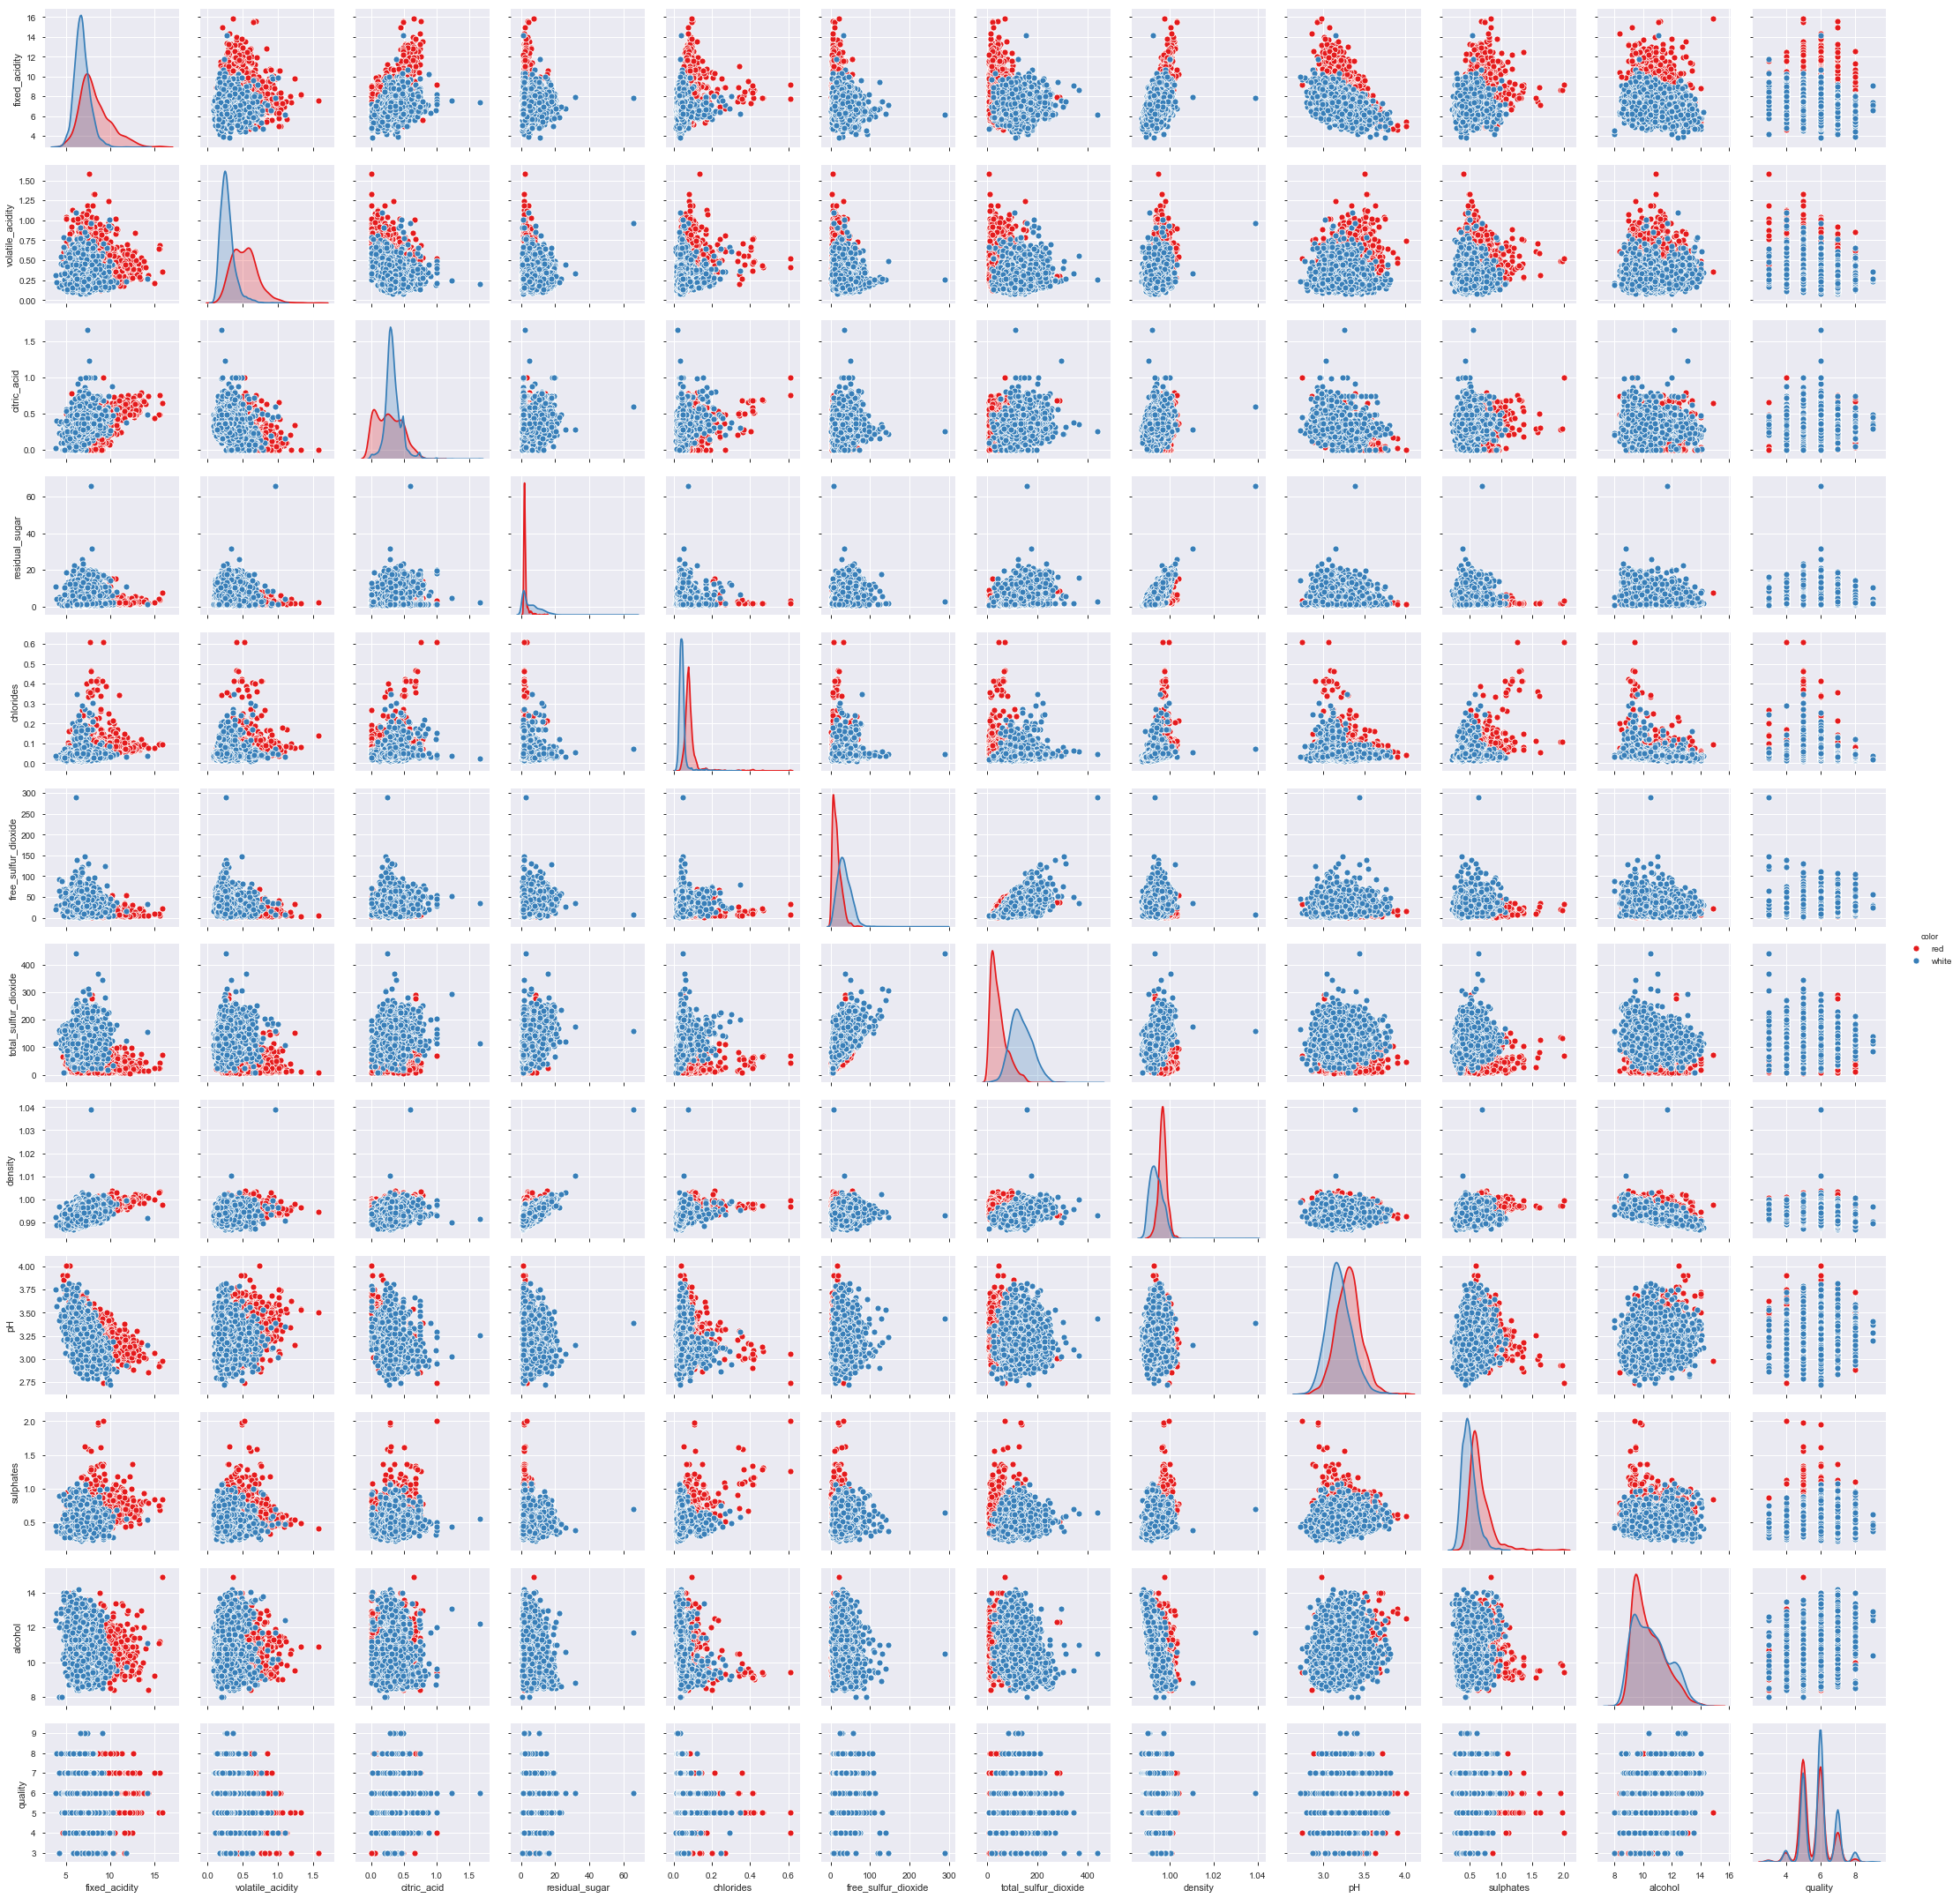

In [8]:
sns.pairplot(df_wine, 
             hue=("color"),
             vars=['fixed_acidity','volatile_acidity',
                   'citric_acid',
                   'residual_sugar',
                  'chlorides','free_sulfur_dioxide','total_sulfur_dioxide',
                  'density', 'pH','sulphates', 'alcohol', 'quality'],
            palette='Set1')
pass



<a style='color:green'> Es complicado ver tendencias entre tantas variables, sin embargo se observa que la correlacion entre unas y otras variables también define el color del vino, por ejemplo vemos que:
    - El vino blanco tiene menos acidez fija que el rojo
    - Hay más presencia de sulfatos en vinos rojos que blancos.
Veremos más adelante el mismo gráfico pero considerando solo aquellas variables que tienen correlación de media a alta con el
color del vino

## <i style= 'color:red' > MODELOS DE CLASIFICACIÓN: PREDECIR EL COLOR DEL VINO

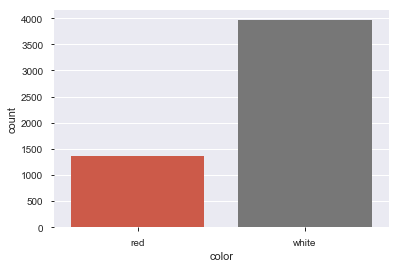

In [9]:
palette ={'red':"C0",'white':"C3"}
sns.countplot(df_wine['color'],palette=palette)
pass

In [10]:
df_wine.shape

(5320, 13)

<a style= 'color:blue' >Transformamos la variable categórica a numérica:

In [7]:
color_cat= df_wine['color'].copy()
encoder = LabelBinarizer()
color_cat_lb = encoder.fit_transform(color_cat)
color_cat_lb

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [8]:
df_wine['color']=color_cat_lb

In [9]:
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,1
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,1
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,0
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,1


In [14]:
df_wine['color'].value_counts()

1    3961
0    1359
Name: color, dtype: int64

In [15]:
df_wine.shape

(5320, 13)

In [16]:
df_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


<a style= 'color:blue'> CORRELACIONES ENTRE VARIABLES


In [17]:
features=list(df_wine.columns)
features=features[0:12]


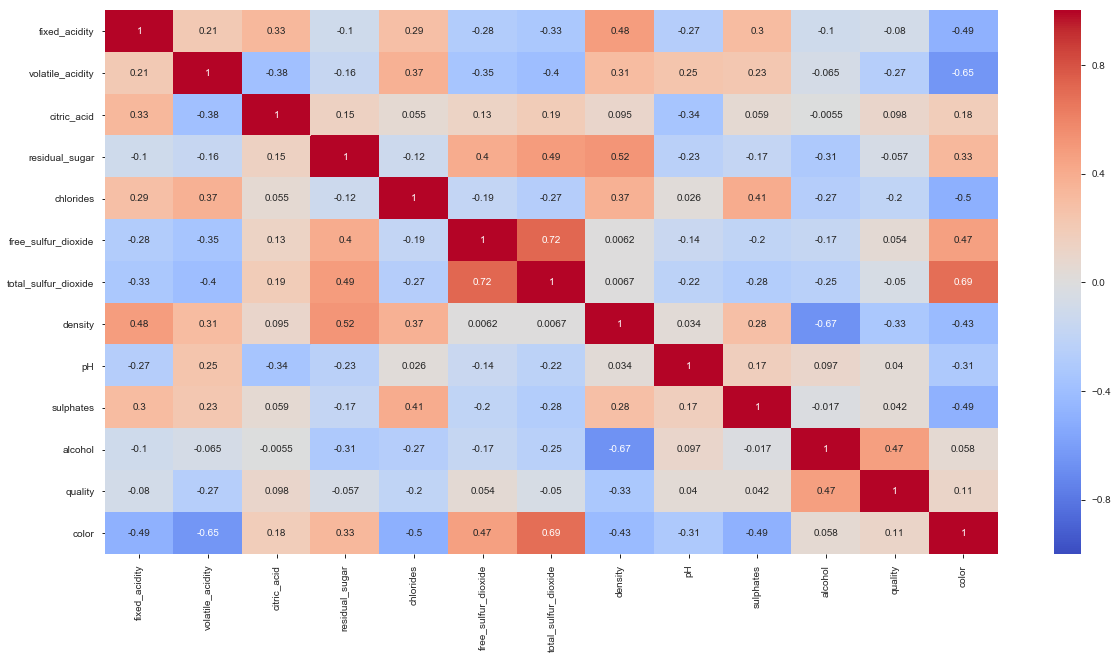

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df_wine.corr(), 
            vmin=-1.0,                       
            vmax=1.0,                       
            annot=True,                      
            cmap="coolwarm")                   
                                             
pass

<a style= 'color:green' >Podemos observar que nuestra target tiene correlaciones altas con el sulfuro dióxido y con la acidez volátil, esta última es una correlación negativa.
Tiene también correlaciones medias con la acidez fija, los cloruros y los sulfatos, con todas estas la relación es negativa también.
<!----blank line---->
Veremos en el siguiente gráfico las correlaciones de las variables con el color superiores al +-45% 

In [19]:
df_wine_grafico=df_wine.copy()

In [20]:
df_wine_grafico=df_wine_grafico.drop([
'citric_acid',
'residual_sugar',
'density',
'pH',
'alcohol',
'quality'], axis=1)


In [21]:
df_wine_grafico.head()

,fixed_acidity,volatile_acidity,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,color
0,5.20,0.34,0.050,27.0,63.0,0.79,0
1,6.20,0.55,0.049,27.0,186.0,0.50,1
2,7.15,0.17,0.119,56.0,178.0,0.44,1
3,6.70,0.64,0.080,11.0,119.0,0.70,0
4,7.60,0.23,0.043,24.0,129.0,0.70,1


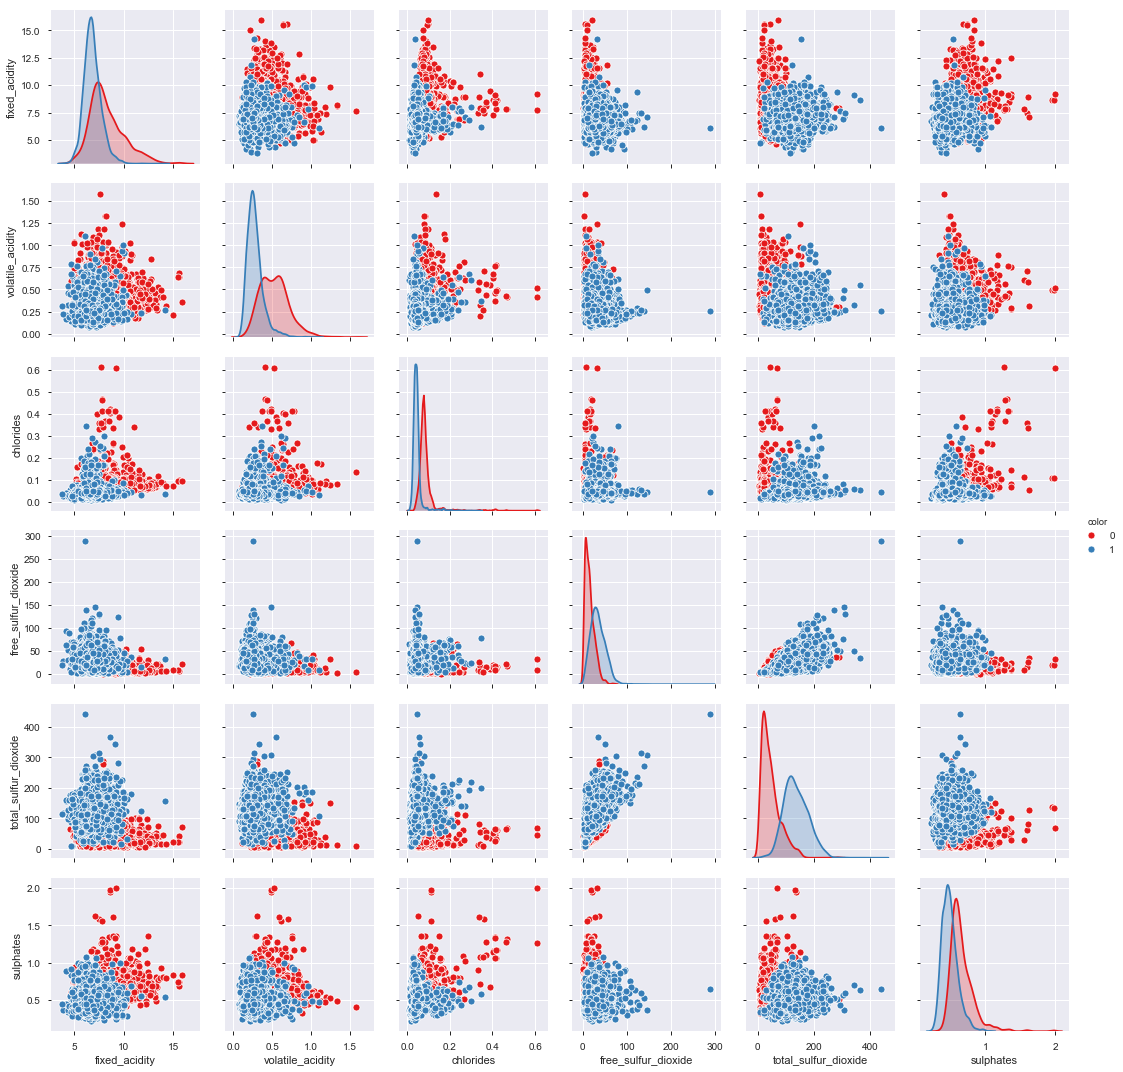

In [22]:
sns.pairplot(df_wine_grafico, 
             hue=("color"),
             vars=['fixed_acidity',
'volatile_acidity',
'chlorides',
'free_sulfur_dioxide',
'total_sulfur_dioxide',
'sulphates'
                  ],
             palette='Set1'
             
            )
pass

<a style= 'color:green'> Con estas variables vemos mejor que existen patrones de separación claros entre el cruce de varias variables y el color del vino, como la acidez, los cloruros y el sulfuro dioxido

<a style='color:blue'> CONJUNTO DE TEST Y TRAIN

In [23]:
df_wine_train, df_wine_test = train_test_split(df_wine,
                                    train_size=0.7,
                                              random_state=1987)

In [24]:
print('Train:\n %s'%df_wine_train['color'].value_counts())
print('Test:\n %s'%df_wine_test['color'].value_counts())

Train:
 1    2753
0     970
Name: color, dtype: int64
Test:
 1    1208
0     389
Name: color, dtype: int64


<a style='color:green'> En la muestra de datos tenemos más cantidad de vinos rojos que blancos, la proporción para el conjunto
    de train y test se mantiene según la muestra original. Veremos si el modelo es mejor prediciendo un color u otro.

<a style='color:blue'> ESCALANDO LOS DATOS

<a style='color:green'> En el análisis de datos hemos detectado outliers en algunas variables, por lo que utilizaremos el metodo Standardscaler que es menos sensible a outliers

In [25]:
#Solo escalaremos las features. No la variable target
df_wine_train2=df_wine_train.iloc[:,0:12].copy()

In [26]:
df_wine_train2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
6405,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,5
3479,7.9,0.44,0.37,5.85,0.033,27.0,93.0,0.99200,3.16,0.54,12.6,7
325,8.2,0.28,0.60,3.00,0.104,10.0,22.0,0.99828,3.39,0.68,10.6,5
609,5.0,0.44,0.04,18.60,0.039,38.0,128.0,0.99850,3.37,0.57,10.2,6
2148,12.9,0.35,0.49,5.80,0.066,5.0,35.0,1.00140,3.20,0.66,12.0,7


In [27]:
#Entrenamos con el conjunto de train
scaler = StandardScaler()
scaler.fit(df_wine_train2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
df_wine_train_sc = scaler.transform(df_wine_train2)
df_wine_train_sc


array([[ 0.04878002, -0.15432146, -0.47196352, ..., -0.42668849,
        -1.49245218, -0.88828605],
       [ 0.49253812,  0.55469391,  0.35107572, ...,  0.03729919,
         1.71899746,  1.36680359],
       [ 0.71441718, -0.39065992,  1.9285676 , ...,  0.96527456,
         0.02876081, -0.88828605],
       ...,
       [-0.17309904, -1.04059067,  0.69400874, ...,  0.56757083,
         0.70485547,  0.23925877],
       [-0.09913935, -0.03615223,  1.17411496, ..., -1.35466386,
         1.38095013,  1.36680359],
       [-0.69081683, -0.3315753 , -0.19761711, ..., -1.15581199,
         1.88802113,  1.36680359]])

In [29]:
df_wine_test2=df_wine_test.iloc[:,0:12].copy()
df_wine_test_sc = scaler.transform(df_wine_test2)
df_wine_test_sc

array([[-1.06061525, -0.98150606,  0.35107572, ..., -0.36040454,
         1.21192647,  0.23925877],
       [-0.17309904,  0.43652468, -0.88348314, ...,  0.1698671 ,
         0.28229631, -0.88828605],
       [ 0.19669939, -0.44974453,  3.23171307, ..., -0.62554036,
        -1.57696401, -0.88828605],
       ...,
       [-0.98665556, -0.3315753 ,  0.0081427 , ..., -1.22209595,
         0.7893673 ,  0.23925877],
       [ 0.04878002,  0.31835546, -0.26620371, ...,  0.30243501,
         1.71899746,  1.36680359],
       [ 1.52797371,  0.85011698,  0.28248912, ...,  1.6281141 ,
         0.28229631,  0.23925877]])

In [30]:
columnas=list(df_wine.columns)
columnas2=columnas[0:12]


In [31]:
df_wine_train_sc=pd.DataFrame(df_wine_train_sc, columns=columnas2)
df_wine_test_sc=pd.DataFrame(df_wine_test_sc, columns=columnas2)

In [32]:
features=list(df_wine.columns)
features=features[0:12]
features


['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [33]:
#Conjuntos estandarizados
x_train=df_wine_train_sc[features]
y_train=df_wine_train["color"]

x_test=df_wine_test_sc[features]
y_test=df_wine_test["color"]

In [34]:
y_test.value_counts()

1    1208
0     389
Name: color, dtype: int64

In [35]:
y_train.value_counts()

1    2753
0     970
Name: color, dtype: int64

In [36]:
#Conjuntos no estandarizados
x_train2=df_wine_train[features]
y_train2=df_wine_train["color"]

x_test2=df_wine_test[features]
y_test2=df_wine_test["color"]

<a style='color:green'> Probaremos los modelos en datos estandarizados y sin estandarizar, para comprobar con qué tipo de datos obtenemos mejores resultados

<a style='color:blue; font-size:1.5em'> MODELOS

<a style='color:blue'> MODELO 1: GRID SEARCH DE REGRESIÓN LOGARITMICA 


In [37]:
#Datos estandarizados
gs_lr=GSC(estimator=LR(),
          param_grid={'C':[1,0.5],
                    'fit_intercept':[True,False],
                      'random_state':[1987]
                     },
          cv=5,
          verbose=2)
#Datos sin estandarizar
gs_lr2=GSC(estimator=LR(),
          param_grid={'C':[1,0.5],
                    'fit_intercept':[True,False],
                      'random_state':[1987]
                     },
          cv=5,
          verbose=2)

In [38]:
#Entrenando el modelo 
gs_lr.fit(x_train,y_train)
gs_lr2.fit(x_train2,y_train2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, fit_intercept=True, random_state=1987 ......................
[CV] ....... C=1, fit_intercept=True, random_state=1987, total=   0.0s
[CV] C=1, fit_intercept=True, random_state=1987 ......................
[CV] ....... C=1, fit_intercept=True, random_state=1987, total=   0.0s
[CV] C=1, fit_intercept=True, random_state=1987 ......................
[CV] ....... C=1, fit_intercept=True, random_state=1987, total=   0.0s
[CV] C=1, fit_intercept=True, random_state=1987 ......................
[CV] ....... C=1, fit_intercept=True, random_state=1987, total=   0.0s
[CV] C=1, fit_intercept=True, random_state=1987 ......................
[CV] ....... C=1, fit_intercept=True, random_state=1987, total=   0.0s
[CV] C=1, fit_intercept=False, random_state=1987 .....................
[CV] ...... C=1, fit_intercept=False, random_state=1987, total=   0.0s
[CV] C=1, fit_intercept=False, random_state=1987 .....................
[CV] ...... C=1, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.5, fit_intercept=True, random_state=1987, total=   0.0s
[CV] C=0.5, fit_intercept=False, random_state=1987 ...................
[CV] .... C=0.5, fit_intercept=False, random_state=1987, total=   0.0s
[CV] C=0.5, fit_intercept=False, random_state=1987 ...................
[CV] .... C=0.5, fit_intercept=False, random_state=1987, total=   0.0s
[CV] C=0.5, fit_intercept=False, random_state=1987 ...................
[CV] .... C=0.5, fit_intercept=False, random_state=1987, total=   0.0s
[CV] C=0.5, fit_intercept=False, random_state=1987 ...................
[CV] .... C=0.5, fit_intercept=False, random_state=1987, total=   0.0s
[CV] C=0.5, fit_intercept=False, random_state=1987 ...................
[CV] .... C=0.5, fit_intercept=False, random_state=1987, total=   0.0s
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, fit_intercept=True, random_state=1987 ......................
[CV] ....... C=1, fit_intercept=True, random_state=1987, total=   0.0s
[CV] C=1, fit_int

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, fit_intercept=False, random_state=1987 .....................
[CV] ...... C=1, fit_intercept=False, random_state=1987, total=   0.0s
[CV] C=1, fit_intercept=False, random_state=1987 .....................
[CV] ...... C=1, fit_intercept=False, random_state=1987, total=   0.0s
[CV] C=1, fit_intercept=False, random_state=1987 .....................
[CV] ...... C=1, fit_intercept=False, random_state=1987, total=   0.0s
[CV] C=1, fit_intercept=False, random_state=1987 .....................
[CV] ...... C=1, fit_intercept=False, random_state=1987, total=   0.0s
[CV] C=0.5, fit_intercept=True, random_state=1987 ....................
[CV] ..... C=0.5, fit_intercept=True, random_state=1987, total=   0.0s
[CV] C=0.5, fit_intercept=True, random_state=1987 ....................
[CV] ..... C=0.5, fit_intercept=True, random_state=1987, total=   0.0s
[CV] C=0.5, fit_intercept=True, random_state=1987 ....................
[CV] ..... C=0.5, fit_intercept=True, random_state=1987, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 0.5], 'fit_intercept': [True, False], 'random_state': [1987]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [40]:
best_lr=gs_lr.best_estimator_
best_lr2=gs_lr2.best_estimator_

<a style='color:blue'> MÉTRICAS

In [41]:
print('Estandarizado')
print(metricas(best_lr,x_test,y_test))
print('\n')
print('No Estandarizado')
print(metricas(best_lr2,x_test2,y_test2))

Estandarizado
Accuracy: 99.31
   Acierto un 99.31% de veces
Recall: 99.59
   Capto el 99.59% de vino blanco
Precisión: 99.5
   Cuando predigo vino blanco lo hago con un 99.5% de probabilidad


Matriz de confusión
[[ 383    6]
 [   5 1203]]
Predigo 6 veces que es blanco cuando es rojo y predigo 5 veces que es rojo cuando es blanco
None


No Estandarizado
Accuracy: 98.31
   Acierto un 98.31% de veces
Recall: 98.76
   Capto el 98.76% de vino blanco
Precisión: 99.0
   Cuando predigo vino blanco lo hago con un 99.0% de probabilidad


Matriz de confusión
[[ 377   12]
 [  15 1193]]
Predigo 12 veces que es blanco cuando es rojo y predigo 15 veces que es rojo cuando es blanco
None


In [42]:
print('Estandarizado')
print(report_met(best_lr,x_test,y_test))
print('\n')
print('No Estandarizado')
print(report_met(best_lr2,x_test2,y_test2))

Estandarizado
              precision    recall  f1-score   support

   Vino Rojo       0.99      0.98      0.99       389
 Vino Blanco       1.00      1.00      1.00      1208

   micro avg       0.99      0.99      0.99      1597
   macro avg       0.99      0.99      0.99      1597
weighted avg       0.99      0.99      0.99      1597

None


No Estandarizado
              precision    recall  f1-score   support

   Vino Rojo       0.96      0.97      0.97       389
 Vino Blanco       0.99      0.99      0.99      1208

   micro avg       0.98      0.98      0.98      1597
   macro avg       0.98      0.98      0.98      1597
weighted avg       0.98      0.98      0.98      1597

None


<a style='color:green'>CONCLUSION 1: Modelo de regresión logarítmica presenta mejores resultados con datos estandarizados, aunque la diferencia es mínima. Vemos en la tabla superior que cuando se trata de predecir vino blanco en el modelo estandarizado acierto el 100% de las veces y cuando se trata de predecir vino rojo acierto el 98% de las veces. 
El hecho de tener menos muestras para un tipo de vino no afecta significativamente en la predicción en este caso.

<a style='color:blue'> MODELO 2: GRID SEARCH DECISION TREE CLASSIFIER

In [43]:
#ESTANDARIZADOS
gs_dtc=GSC(estimator=DTC(),
          param_grid={'criterion':['gini','entropy'],
                    'max_depth':[2,3,4,5,6],
                      'random_state':[1987]
                     },
          cv=5,
          verbose=0)
#SIN ESTANDARIZAR
gs_dtc2=GSC(estimator=DTC(),
          param_grid={'criterion':['gini','entropy'],
                    'max_depth':[2,3,4,5,6],
                      'random_state':[1987]
                     },
          cv=5,
          verbose=0)

In [44]:
gs_dtc.fit(x_train,y_train)
gs_dtc2.fit(x_train2,y_train2)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6], 'random_state': [1987]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
best_dtc=gs_dtc.best_estimator_
best_dtc2=gs_dtc2.best_estimator_


In [46]:
print('Estandarizado')
print(metricas(best_dtc,x_test,y_test))
print('\n')
print('No Estandarizado')
print(metricas(best_dtc2,x_test2,y_test2))


Estandarizado
Accuracy: 98.18
   Acierto un 98.18% de veces
Recall: 99.01
   Capto el 99.01% de vino blanco
Precisión: 98.6
   Cuando predigo vino blanco lo hago con un 98.6% de probabilidad


Matriz de confusión
[[ 372   17]
 [  12 1196]]
Predigo 17 veces que es blanco cuando es rojo y predigo 12 veces que es rojo cuando es blanco
None


No Estandarizado
Accuracy: 98.18
   Acierto un 98.18% de veces
Recall: 99.01
   Capto el 99.01% de vino blanco
Precisión: 98.6
   Cuando predigo vino blanco lo hago con un 98.6% de probabilidad


Matriz de confusión
[[ 372   17]
 [  12 1196]]
Predigo 17 veces que es blanco cuando es rojo y predigo 12 veces que es rojo cuando es blanco
None


In [47]:
print('Estandarizado')
print(report_met(best_dtc,x_test,y_test))
print('\n')
print('No Estandarizado')
print(report_met(best_dtc2,x_test2,y_test2))

Estandarizado
              precision    recall  f1-score   support

   Vino Rojo       0.97      0.96      0.96       389
 Vino Blanco       0.99      0.99      0.99      1208

   micro avg       0.98      0.98      0.98      1597
   macro avg       0.98      0.97      0.98      1597
weighted avg       0.98      0.98      0.98      1597

None


No Estandarizado
              precision    recall  f1-score   support

   Vino Rojo       0.97      0.96      0.96       389
 Vino Blanco       0.99      0.99      0.99      1208

   micro avg       0.98      0.98      0.98      1597
   macro avg       0.98      0.97      0.98      1597
weighted avg       0.98      0.98      0.98      1597

None


<a style='color:green '>CONCLUSION: La diferencia en un modelo de arbol entre datos estandarizados y sin estandarizar es más baja que en la regresión logística. Este modelo tiene peores métricas que la regresión logística.

<a style='color:blue'> SIGNIFICANCIA DE LAS VARIABLES

In [48]:
#La significancia de las variables la calculo sobreestimando el modelo
dtc_importance=DTC(max_depth=10, random_state=1987)
dtc_importance.fit(df_wine_train[features], df_wine_train['color'])
variables=dtc_importance.feature_importances_

In [49]:
df_featureimportances=pd.DataFrame(variables, columns=['Importancia'])
df_featureimportances['Variable']=features
df_featureimportances

,Importancia,Variable
0,0.025941,fixed_acidity
1,0.015542,volatile_acidity
2,0.000486,citric_acid
3,0.007664,residual_sugar
4,0.655297,chlorides
5,0.001062,free_sulfur_dioxide
6,0.224040,total_sulfur_dioxide
7,0.026628,density
8,0.013924,pH
9,0.025607,sulphates


<a style='color:green'>El sulfuro dioxido y los cloruros son los que más aportan para la predicción del color entre las dos suman un 87,9%. Podríamos usar solo esas variables para obtener buenos resultados. Ya nos lo indicaba así nuestra matriz de correlaciones
en las que se veía una alta correlación del color con estas dos variables.
<!---blank line--->
Los cloruros son la clave para determinar el color del vino. junto con el sulfuro dioxido explican el color del vino en un 87.9%
<!---blank line--->
En este caso al ser pocas las variables involucradas para la predicción, decidimos usar todas, como obtenemos modelos realmente buenos no hace falta quitar ninguna variable que pueda estar empeorando el modelo.


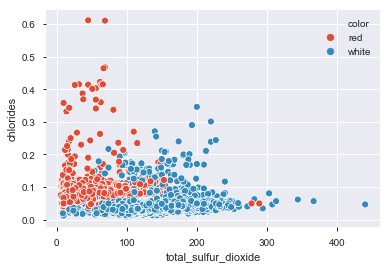

In [50]:
sns.scatterplot(x='total_sulfur_dioxide', y='chlorides', hue='color', data=df_wine1)
pass

<a style= 'color:green'>
Según el gráfico, la mayoría de muestras de vino blanco tiene cantidades de cloruro más bajas que el vino rojo y el vino
blanco tiene cantidades de sulfuro dioxido más altas  que el vino rojo.

<a style='color:blue'> MODELO 3: GRID SEARCH CON RANDOM FOREST CLASSIFIER

In [51]:
#DATOS ESTANDARIZADOS
gs_rfc=GSC(estimator=RFC(),
          param_grid={'criterion':['gini','entropy'],
                    'max_depth':[2,3,4,5,6,7,8,9],
                      'n_estimators':[5,10,15,20,25],
                      'random_state':[1987]
                     },
          cv=5,
          verbose=0)
#DATOS SIN ESNTANDARIZAR
gs_rfc2=GSC(estimator=RFC(),
          param_grid={'criterion':['gini','entropy'],
                    'max_depth':[2,3,4,5,6,7,8,9],
                      'n_estimators':[5,10,15,20,25],
                      'random_state':[1987]
                     },
          cv=5,
          verbose=0)

In [52]:
gs_rfc.fit(x_train,y_train)
gs_rfc2.fit(x_train2,y_train2)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'n_estimators': [5, 10, 15, 20, 25], 'random_state': [1987]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
best_rfc=gs_rfc.best_estimator_
best_rfc2=gs_rfc2.best_estimator_


In [54]:
print('Estandarizado')
print(metricas(best_rfc,x_test,y_test))
print('\n')
print('No Estandarizado')
print(metricas(best_rfc2,x_test2,y_test2))


Estandarizado
Accuracy: 99.37
   Acierto un 99.37% de veces
Recall: 99.83
   Capto el 99.83% de vino blanco
Precisión: 99.34
   Cuando predigo vino blanco lo hago con un 99.34% de probabilidad


Matriz de confusión
[[ 381    8]
 [   2 1206]]
Predigo 8 veces que es blanco cuando es rojo y predigo 2 veces que es rojo cuando es blanco
None


No Estandarizado
Accuracy: 99.37
   Acierto un 99.37% de veces
Recall: 99.83
   Capto el 99.83% de vino blanco
Precisión: 99.34
   Cuando predigo vino blanco lo hago con un 99.34% de probabilidad


Matriz de confusión
[[ 381    8]
 [   2 1206]]
Predigo 8 veces que es blanco cuando es rojo y predigo 2 veces que es rojo cuando es blanco
None


In [55]:
print('Estandarizado')
print(report_met(best_rfc,x_test,y_test))
print('\n')
print('No Estandarizado')
print(report_met(best_rfc2,x_test2,y_test2))

Estandarizado
              precision    recall  f1-score   support

   Vino Rojo       0.99      0.98      0.99       389
 Vino Blanco       0.99      1.00      1.00      1208

   micro avg       0.99      0.99      0.99      1597
   macro avg       0.99      0.99      0.99      1597
weighted avg       0.99      0.99      0.99      1597

None


No Estandarizado
              precision    recall  f1-score   support

   Vino Rojo       0.99      0.98      0.99       389
 Vino Blanco       0.99      1.00      1.00      1208

   micro avg       0.99      0.99      0.99      1597
   macro avg       0.99      0.99      0.99      1597
weighted avg       0.99      0.99      0.99      1597

None


In [56]:
prettytable(best_lr,best_dtc,best_rfc,x_test,y_test,lista=['Métricas','Reg.Logística','Arbol Decisión','Random Forest'])

+-----------+---------------+----------------+---------------+
|  Métricas | Reg.Logística | Arbol Decisión | Random Forest |
+-----------+---------------+----------------+---------------+
|  Accuracy |     99.31     |     98.18      |     99.37     |
|   Recall  |     99.59     |     99.01      |     99.83     |
| Precision |      99.5     |      98.6      |     99.34     |
+-----------+---------------+----------------+---------------+


<a style= 'color:green'> CONCLUSION: Modelo ganador: RANDOM FOREST CLASSIFIER en datos estandarizados.
Todos los modelos dan métricas realmente buenas. RFC es más robusto por muy poca diferencia, como se puede ver en la tabla anterior. No hemos probado más modelos ya que hemos conseguido excelentes resultados con estos 3.

## <i style= 'color:red' > MODELOS DE REGRESIÓN: MODELOS PREDICCIÓN CALIDAD DEL VINO

<a style='color:blue'> CONJUNTOS TRAIN Y TEST

In [61]:
df_wine_train_quality=df_wine_train.copy()
df_wine_test_quality=df_wine_test.copy()

In [62]:
df_wine_train_quality2=df_wine_train_quality.copy()
df_wine_test_quality2=df_wine_test_quality.copy()

df_wine_train_quality2=df_wine_train_quality2.drop('quality', axis=1)
df_wine_test_quality2=df_wine_test_quality2.drop('quality', axis=1)


In [63]:
x_train_q=df_wine_train_quality2
y_train_q=df_wine_train_quality['quality']

x_test_q=df_wine_test_quality2
y_test_q=df_wine_test_quality['quality']


<a style='color:blue'> PIPELINES

In [64]:

#RANDOM FOREST REGRESOR WITH SELECTKBEST
rfr_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                               ("kbest",SelectKBest()),
                               ("rfr",RFR())
                              ]
                       )
#RANDOM FOREST REGRESOR WITH RFECV

rfr_rfecv = Pipeline(steps=[("scaler",StandardScaler()),
                               ("rfecv",RFECV(estimator=LR())),
                               ("rfr",RFR())
                              ]
                       )

#LINEAR REGRESION REGRESOR WITH SELECTKBEST
lrr_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                               ("kbest",SelectKBest()),
                               ("lrr",LRR())
                              ]
                       )
#LINEAR REGRESION REGRESOR WITH RFECV
lrr_rfecv = Pipeline(steps=[("scaler",StandardScaler()),
                               ("rfecv",RFECV(estimator=LR())),
                               ("lrr",LRR())
                              ]
                       )

#RIDGE  WITH RFECV
ridge_rfecv = Pipeline(steps=[("scaler",StandardScaler()),
                               ("rfecv",RFECV(estimator=LR())),
                               ("ridge",Ridge())
                              ]
                       )
#RIDGE  WITH SELECTKBEST
ridge_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                               ("kbest",SelectKBest()),
                               ("ridge",Ridge())
                              ]
                       )

#LASSO  WITH SELECTKBEST
lasso_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                               ("kbest",SelectKBest()),
                               ("lasso",Lasso())
                              ]
                       )
#LASSO  WITH RFECV
lasso_rfecv = Pipeline(steps=[("scaler",StandardScaler()),
                               ("rfecv",RFECV(estimator=LR())),
                               ("lasso",Lasso())
                              ]
                       )
#ELASTIC NET  WITH RFECV
elastic_rfecv = Pipeline(steps=[("scaler",StandardScaler()),
                               ("rfecv",RFECV(estimator=LR())),
                               ("elastic",ElasticNet())
                              ]
                       )

#ELASTIC NET  WITH SELECTKBEST
elastic_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                               ("kbest",SelectKBest()),
                               ("elastic",ElasticNet())
                              ]
                       )
#DECISION TREE REG  WITH SELECTKBEST
dtr_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                               ("kbest",SelectKBest()),
                               ("dtr",DTR())
                              ]
                       )
#DECISION TREE REG  WITH RFECV
dtr_rfecv = Pipeline(steps=[("scaler",StandardScaler()),
                               ("rfecv",RFECV(estimator=LR())),
                               ("dtr",DTR())
                              ]
                       )
#ADABOOSTER  WITH RFECV
abr_rfecv = Pipeline(steps=[("scaler",StandardScaler()),
                               ("rfecv",RFECV(estimator=LR())),
                               ("abr",ABR())
                              ]
                       )
#ADA BOOST  WITH SELECTKBEST
abr_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                               ("kbest",SelectKBest()),
                               ("abr",ABR())
                              ]
                       )

#GRADIENT BOOST  WITH SELECTKBEST
gbr_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                               ("kbest",SelectKBest()),
                               ("gbr",GBR())
                              ]
                       )
#GRADIENT BOOST  WITH RFECV


#MLP REG  WITH RFECV

mlp_rfecv = Pipeline(steps=[("scaler",StandardScaler()),
                               ("rfecv",RFECV(estimator=LR())),
                               ("mlp",MLPR())
                              ]
                       )
#MLP REG  WITH SELECTKBEST

mlp_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                               ("kbest",SelectKBest()),
                               ("mlp",MLPR())
                              ]
                       )




In [79]:
#HIPERPARAMETROS


grid_rfr_kbest={'kbest__score_func': [f_classif],
                'rfr__criterion':['mae','mse'],
               'rfr__max_depth':[2,3,4,5,6,7,8,9,10],
               'rfr__n_estimators':[5,10,15,20,30,40],
               'rfr__random_state':[1987]}
grid_rfr_rfecv={'rfecv__step': [1], 
                'rfecv__cv': [5],
                'rfr__criterion':['mae','mse'],
               'rfr__max_depth':[2,3,4,5,6,7,8,9,10],
               'rfr__n_estimators':[5,10,15,20,30,40],
               'rfr__random_state':[1987]}
grid_lrr_kbest={'kbest__score_func': [f_classif],
                'lrr__fit_intercept':[True,False]}
grid_lrr_rfecv={'rfecv__step': [1], 
                'rfecv__cv': [5],
                'lrr__fit_intercept':[True,False]}
grid_ridge_rfecv={'rfecv__step': [1], 
                'rfecv__cv': [5],
                'ridge__solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                 'ridge__fit_intercept':[True,False],
               'ridge__random_state':[1987]}
grid_ridge_kbest={'kbest__score_func': [f_classif],
                'ridge__solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                 'ridge__fit_intercept':[True,False],
               'ridge__random_state':[1987]}
grid_lasso_kbest={'kbest__score_func': [f_classif],
                'lasso__fit_intercept':[True,False],
               'lasso__random_state':[1987]}
grid_lasso_rfecv={'rfecv__step': [1], 
                'rfecv__cv': [5],
                'lasso__fit_intercept':[True,False],
               'lasso__random_state':[1987]}
grid_elastic_rfecv={'rfecv__step': [1], 
                'rfecv__cv': [5],
                'elastic__l1_ratio':[0,1,0.5],
                   'elastic__fit_intercept':[True,False],
               'elastic__random_state':[1987]}
grid_elastic_kbest={'kbest__score_func': [f_classif],
                    'elastic__l1_ratio':[0,1,0.5],
                   'elastic__fit_intercept':[True,False],
               'elastic__random_state':[1987]}
grid_dtr_kbest={'kbest__score_func': [f_classif],
                'dtr__criterion':['mae','mse'],
               'dtr__max_depth':[2,3,4,5,6,7,8,9,10],
               'dtr__random_state':[1987]}
grid_dtr_rfecv={'rfecv__step': [1], 
                'rfecv__cv': [5],
                'dtr__criterion':['mae','mse'],
               'dtr__max_depth':[2,3,4,5,6,7,8,9,10],
               'dtr__random_state':[1987]}
grid_abr_rfecv={'rfecv__step': [1], 
                'rfecv__cv': [5],
                'abr__loss':['linear','square', 'exponential'],
                'abr__n_estimators':[10,20,30,50,60],
                'abr__random_state':[1987]}
grid_abr_kbest={'kbest__score_func': [f_classif],
                'abr__loss':['linear','square', 'exponential'],
                'abr__n_estimators':[10,20,30,50,60],
                'abr__random_state':[1987]}
grid_gbr_kbest={'kbest__score_func': [f_classif],
                'gbr__loss':['ls', 'lad', 'huber', 'quantile'],
                'gbr__n_estimators':[50,100,150,200],
                'gbr__criterion':['friedman_mse','mse','mae'],
                'gbr__max_depth':[2,3,4,5,6,7,8,9,10],
                'gbr__random_state':[1987]}

grid_mlp_rfecv={'rfecv__step': [1], 
                'rfecv__cv': [5],
                'mlp__activation':['identity', 'logistic', 'tanh', 'relu'],
               'mlp__solver':['lbfgs','sgd', 'adam'],
               'mlp__learning_rate':['constant', 'invscaling', 'adaptive'],
               'mlp__random_state':[1987]}
grid_mlp_kbest={'kbest__score_func': [f_classif],
                'mlp__activation':['identity', 'logistic', 'tanh', 'relu'],
               'mlp__solver':['lbfgs','sgd', 'adam'],
               'mlp__learning_rate':['constant', 'invscaling', 'adaptive'],
               'mlp__random_state':[1987]}






In [179]:
gs_rfr_kbest=GSC(rfr_kbest,
                grid_rfr_kbest,
                cv=10)
gs_rfr_rfecv=GSC(rfr_rfecv,
                grid_rfr_rfecv,
                cv=10)
gs_lrr_kbest=GSC(lrr_kbest,
                grid_lrr_kbest,
                cv=10)
gs_lrr_rfecv=GSC(lrr_rfecv,
                grid_lrr_rfecv,
                cv=10)
gs_ridge_rfecv=GSC(ridge_rfecv,
                  grid_ridge_rfecv,
                  cv=10)
gs_ridge_kbest=GSC(ridge_kbest,
                  grid_ridge_kbest,
                  cv=10)
gs_lasso_kbest=GSC(lasso_kbest,
                  grid_lasso_kbest,
                  cv=10)
gs_lasso_rfecv=GSC(lasso_rfecv,
                  grid_lasso_rfecv,
                  cv=10)
gs_elastic_rfecv=GSC(elastic_rfecv,
                    grid_elastic_rfecv,
                    cv=10)
gs_elastic_kbest=GSC(elastic_kbest,
                    grid_elastic_kbest,
                    cv=10)
gs_dtr_kbest=GSC(dtr_kbest,
                grid_dtr_kbest,
                cv=10)
gs_dtr_rfecv=GSC(dtr_rfecv,
                grid_dtr_rfecv,
                cv=10)
gs_abr_rfecv=GSC(abr_rfecv,
                grid_abr_rfecv,
                cv=10)
gs_abr_kbest=GSC(abr_kbest,
                grid_abr_kbest,
                cv=10)
gs_gbr_kbest=GSC(gbr_kbest,
                grid_gbr_kbest,
                cv=10)

gs_mlp_rfecv=GSC(mlp_rfecv,
                grid_mlp_rfecv,
                cv=10,
                verbose=2)
gs_mlp_kbest=GSC(mlp_kbest,
                grid_mlp_kbest,
                cv=10,
                verbose=2)


pipelines2 = [gs_rfr_kbest,
gs_rfr_rfecv,
gs_lrr_kbest,
gs_lrr_rfecv,
gs_ridge_rfecv,
gs_ridge_kbest,
gs_lasso_kbest,
gs_lasso_rfecv,
gs_elastic_rfecv,
gs_elastic_kbest,
gs_dtr_kbest,
gs_dtr_rfecv,
gs_abr_rfecv,
gs_abr_kbest,
gs_gbr_kbest,
gs_gbr_rfecv,
gs_mlp_rfecv,
gs_mlp_kbest]


pipelines4 = [gs_rfr_kbest,
gs_rfr_rfecv,
gs_lrr_kbest,
gs_lrr_rfecv,
gs_ridge_rfecv,
gs_ridge_kbest,
gs_lasso_kbest,
gs_lasso_rfecv,
gs_elastic_rfecv,
gs_elastic_kbest,
gs_dtr_kbest,
gs_dtr_rfecv,
gs_abr_rfecv,
gs_abr_kbest,
gs_gbr_kbest]

In [91]:
pipelines4 = [gs_rfr_kbest,
gs_rfr_rfecv,
gs_lrr_kbest,
gs_lrr_rfecv,
gs_ridge_rfecv,
gs_ridge_kbest,
gs_lasso_kbest,
gs_lasso_rfecv,
gs_elastic_rfecv,
gs_elastic_kbest,
gs_dtr_kbest,
gs_dtr_rfecv,
gs_abr_rfecv,
gs_abr_kbest,
gs_gbr_kbest]

In [101]:
pipe_dict3 = {0:'Random FR Kbest',
1:'Random FR rfecv',
2:'Linear Regresion kbest',
3:'Linear Regresion rfecv',
4:'Ridge rfecv',
5:'Ridge kbest',
6:'Lasso kbest',
7:'Lasso rfecv',
8:'ElasticNet rfecv',
9:'ElasticNet kbest',
10:'Decision Tree kbest',
11:'Decision Tree rfecv',
12:'Ada Boost rfecv',
13:'Ada Boost kbest',
14:'Gradient Boost kbest'}

<a style='color:green'> Hemos hecho pipelines que escalen los datos con StandardScaler, que seleccionen features con dos tipos de seleccionadores: Kbest y RFECV y además se han incluido 14 modelos distintos cada uno usando Grid search con distintos hiperparámetros

In [ ]:
for pipe in pipelines2:
    print('ejecutando %s'%pipe)
    pipe.fit(x_train_q, y_train_q)


ejecutando GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kbest', SelectKBest(k=10, score_func=<function f_classif at 0x0000010DF4B6ED90>)), ('rfr', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
      ...s='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kbest__score_func': [<function f_classif at 0x0000010DF4B6ED90>], 'rfr__criterion': ['mae', 'mse'], 'rfr__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'rfr__n_estimators': [5, 10, 15, 20, 30, 40], 'rfr__random_state': [1987]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
ejecutando GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(

<a style='color:blue'> MÉTRICAS

In [178]:
for idx, val in enumerate(pipelines4):
    print(pipe_dict3[idx])
    print(metricas_reg(val,x_test_q,y_test_q))

Random FR Kbest
R2:0.257,MAE:0.468,RMSE:0.743
None
Random FR rfecv
R2:0.256,MAE:0.471,RMSE:0.744
None
Linear Regresion kbest
R2:0.177,MAE:0.496,RMSE:0.783
None
Linear Regresion rfecv
R2:0.216,MAE:0.479,RMSE:0.764
None
Ridge rfecv
R2:0.22,MAE:0.477,RMSE:0.762
None
Ridge kbest
R2:0.175,MAE:0.497,RMSE:0.783
None
Lasso kbest
R2:-0.047,MAE:0.626,RMSE:0.882
None
Lasso rfecv
R2:-0.047,MAE:0.626,RMSE:0.882
None
ElasticNet rfecv
R2:0.074,MAE:0.552,RMSE:0.83
None
ElasticNet kbest
R2:0.074,MAE:0.559,RMSE:0.83
None
Decision Tree kbest
R2:0.154,MAE:0.513,RMSE:0.793
None
Decision Tree rfecv
R2:0.135,MAE:0.524,RMSE:0.802
None
Ada Boost rfecv
R2:0.201,MAE:0.497,RMSE:0.771
None
Ada Boost kbest
R2:0.191,MAE:0.499,RMSE:0.776
None
Gradient Boost kbest
R2:0.26,MAE:0.465,RMSE:0.742
None


In [173]:
R2MAX=0
maemin=1000
rmsemin=1000
for idx, val in enumerate(pipelines4):
    R2=round(r2(y_pred=np.round(val.best_estimator_.predict(x_test_q),0),y_true=y_test_q),3)
    if R2>R2MAX:
        R2MAX=R2
        best_model=pipe_dict3[idx]
        
    MAE=round((mae(y_pred=np.round(val.best_estimator_.predict(x_test_q),0),y_true=y_test_q)),3)
    if MAE<maemin:
        maemin=MAE
        best_model_mae= pipe_dict3[idx]
    
    RMSE=round(np.sqrt(mse(y_pred=np.round(val.best_estimator_.predict(x_test_q),0),y_true=y_test_q)),3)
    if RMSE<rmsemin:
        rmsemin=RMSE
        best_model_rmse= pipe_dict3[idx]

print('Mejor modelo: %s R2:%s'%(best_model, R2MAX))
print('Mejor modelo: %s MAE:%s'%(best_model_mae,maemin))
print('Mejor modelo: %s RMSE:%s'%(best_model_rmse,rmsemin))

Mejor modelo: Gradient Boost kbest R2:0.26
Mejor modelo: Gradient Boost kbest MAE:0.465
Mejor modelo: Gradient Boost kbest RMSE:0.742


In [175]:
t2 = PrettyTable(['Métricas','Modelo','Valor'])
t2.add_row(['RMSE',best_model_rmse,rmsemin])
t2.add_row(['MAE', best_model_mae,maemin])
t2.add_row(['R2', best_model,R2MAX])
print(t2)

+----------+----------------------+-------+
| Métricas |        Modelo        | Valor |
+----------+----------------------+-------+
|   RMSE   | Gradient Boost kbest | 0.742 |
|   MAE    | Gradient Boost kbest | 0.465 |
|    R2    | Gradient Boost kbest |  0.26 |
+----------+----------------------+-------+


<a style='color:green'> Tras correr todos los pipelines el modelo más robusto es el Gradient Boost con selector de variables Kbest. Se han obtenido las siguientes métricas:
    - RMSE: 0.742
    - MAE: 0.465
    Estos dos valores nos explican que la mayoria de veces nos equivocamos en media 0.74 puntos en predecir la calidad del vino
    - R2: 0.26
    El R2 nos explica que la calidad del vino está explicada en un 26% por las variables escogidas.
Esto nos muestra que con estas variables es complicado predecir la calidad de forma perfecta, no son variables que tengan correlaciones altas con la calidad como se aprecia en el siguiente gráfico. Tiene correlaciones inferiores al 10% con el 58% de variables, correlaciones entre 11% y 33% con el 25% de las variables y solamente con el alcohol tiene una correlación del 47%, esto explica perfectamente el bajo valor de la última métrica, que permite concluir que con estas variables es complicado predecir la calidad del vino de manera precisa. 

![alt text](captura.jpg "Title")

In [185]:
#probamos GBR con las mismas especificaciones que el best model pero con select rfecv
gbr_rfecv = Pipeline(steps=[("scaler",StandardScaler()),
                               ("rfecv",RFECV(estimator=LR())),
                               ("gbr",GBR())
                              ]
                       )
grid_gbr_rfecv={'rfecv__step': [1], 
                'rfecv__cv': [5],
                'gbr__loss':['huber'],
                'gbr__n_estimators':[150],
                'gbr__criterion':['friedman_mse'],
                'gbr__max_depth':[3],
                'gbr__random_state':[1987]}

gs_gbr_rfecv=GSC(gbr_rfecv,
                grid_gbr_rfecv,
                cv=10,
                verbose=2)

In [186]:
gs_gbr_rfecv.fit(x_train_q,y_train_q)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] gbr__criterion=friedman_mse, gbr__loss=huber, gbr__max_depth=3, gbr__n_estimators=150, gbr__random_state=1987, rfecv__cv=5, rfecv__step=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gbr__criterion=friedman_mse, gbr__loss=huber, gbr__max_depth=3, gbr__n_estimators=150, gbr__random_state=1987, rfecv__cv=5, rfecv__step=1, total=   3.6s
[CV] gbr__criterion=friedman_mse, gbr__loss=huber, gbr__max_depth=3, gbr__n_estimators=150, gbr__random_state=1987, rfecv__cv=5, rfecv__step=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV]  gbr__criterion=friedman_mse, gbr__loss=huber, gbr__max_depth=3, gbr__n_estimators=150, gbr__random_state=1987, rfecv__cv=5, rfecv__step=1, total=   2.5s
[CV] gbr__criterion=friedman_mse, gbr__loss=huber, gbr__max_depth=3, gbr__n_estimators=150, gbr__random_state=1987, rfecv__cv=5, rfecv__step=1 
[CV]  gbr__criterion=friedman_mse, gbr__loss=huber, gbr__max_depth=3, gbr__n_estimators=150, gbr__random_state=1987, rfecv__cv=5, rfecv__step=1, total=   2.5s
[CV] gbr__criterion=friedman_mse, gbr__loss=huber, gbr__max_depth=3, gbr__n_estimators=150, gbr__random_state=1987, rfecv__cv=5, rfecv__step=1 
[CV]  gbr__criterion=friedman_mse, gbr__loss=huber, gbr__max_depth=3, gbr__n_estimators=150, gbr__random_state=1987, rfecv__cv=5, rfecv__step=1, total=   2.7s
[CV] gbr__criterion=friedman_mse, gbr__loss=huber, gbr__max_depth=3, gbr__n_estimators=150, gbr__random_state=1987, rfecv__cv=5, rfecv__step=1 
[CV]  gbr__criterion=friedman_mse, gbr__loss=huber, gbr__max_depth=3, gbr__n_estimators=150

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   28.9s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfecv', RFECV(cv='warn',
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', rand...one, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'rfecv__step': [1], 'rfecv__cv': [5], 'gbr__loss': ['huber'], 'gbr__n_estimators': [150], 'gbr__criterion': ['friedman_mse'], 'gbr__max_depth': [3], 'gbr__random_state': [1987]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [187]:
metricas_reg(gs_gbr_rfecv,x_test_q,y_test_q)
#no mejora con el feature selector rfecv

R2:0.252,MAE:0.471,RMSE:0.746


In [180]:
#probamos mlps para ver si mejoran al gradient boost.
gs_mlp_rfecv.fit(x_train_q,y_train_q)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs, rfecv__cv=5, rfecv__step=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs, rfecv__cv=5, rfecv__step=1, total=   1.6s
[CV] mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs, rfecv__cv=5, rfecv__step=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs, rfecv__cv=5, rfecv__step=1, total=   1.4s
[CV] mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs, rfecv__cv=5, rfecv__step=1 
[CV]  mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs, rfecv__cv=5, rfecv__step=1, total=   1.4s
[CV] mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs, rfecv__cv=5, rfecv__step=1 
[CV]  mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs, rfecv__cv=5, rfecv__step=1, total=   1.3s
[CV] mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs, rfecv__cv=5, rfecv__step=1 
[CV]  mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs, rfecv__cv=5, rfecv__step=1, total=   1.5s
[CV] mlp__activation=id

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 24.1min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfecv', RFECV(cv='warn',
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', rand...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'rfecv__step': [1], 'rfecv__cv': [5], 'mlp__activation': ['identity', 'logistic', 'tanh', 'relu'], 'mlp__solver': ['lbfgs', 'sgd', 'adam'], 'mlp__learning_rate': ['constant', 'invscaling', 'adaptive'], 'mlp__random_state': [1987]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [188]:
gs_mlp_kbest.fit(x_train_q,y_train_q)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] kbest__score_func=<function f_classif at 0x0000010DF4B6ED90>, mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs 
[CV]  kbest__score_func=<function f_classif at 0x0000010DF4B6ED90>, mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs, total=   0.0s
[CV] kbest__score_func=<function f_classif at 0x0000010DF4B6ED90>, mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  kbest__score_func=<function f_classif at 0x0000010DF4B6ED90>, mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs, total=   0.0s
[CV] kbest__score_func=<function f_classif at 0x0000010DF4B6ED90>, mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs 
[CV]  kbest__score_func=<function f_classif at 0x0000010DF4B6ED90>, mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs, total=   0.0s
[CV] kbest__score_func=<function f_classif at 0x0000010DF4B6ED90>, mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs 
[CV]  kbest__score_func=<function f_classif at 0x0000010DF4B6ED90>, mlp__activation=identity, mlp__learning_rate=constant, mlp__random_state=1987, mlp__solver=lbfgs, total=   0.0s
[CV] kbest__score_func=<function f_classif at 0x0000010DF4B6ED90>, mlp__activation=identity, mlp__learning_rate=constant, mlp__ran

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 11.1min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kbest', SelectKBest(k=10, score_func=<function f_classif at 0x0000010DF4B6ED90>)), ('mlp', MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kbest__score_func': [<function f_classif at 0x0000010DF4B6ED90>], 'mlp__activation': ['identity', 'logistic', 'tanh', 'relu'], 'mlp__solver': ['lbfgs', 'sgd', 'adam'], 'mlp__learning_rate': ['constant', 'invscaling', 'adaptive'], 'mlp__random_state': [1987]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [184]:
metricas_reg(gs_mlp_rfecv,x_test_q,y_test_q)

R2:0.255,MAE:0.469,RMSE:0.744


In [189]:
metricas_reg(gs_mlp_kbest,x_test_q,y_test_q)

R2:0.247,MAE:0.471,RMSE:0.748


<a style='color:green'> Se probaron también MLPs pero no mejoran las métricas del Gradient Boost.
El Gradient Boost es un modelo centrado en reducir el error, los hiperparámetros que mejor funcionaron son:
    - Criterio de reduccion de error: Friedman-mse
    - Learning rate=0.1
    - Profundidad de los arboles=3
    - Número de árboles=150
El modelo se ha predicho y medido con los valores redondeados, es decir como los valores a predecir no pueden tener decimales, todos los resultados predichos son enteros, esto causa que el error disminuya.

In [165]:
#detalles
mejor_pipeline = gs_gbr_kbest.best_estimator_

mejor_pipeline.steps

[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('kbest',
  SelectKBest(k=10, score_func=<function f_classif at 0x0000010DF4B6ED90>)),
 ('gbr',
  GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='huber', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=150,
               n_iter_no_change=None, presort='auto', random_state=1987,
               subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
               warm_start=False))]

In [174]:
#guardamos el modelo ganador
with open("mejor_pipeline_vino.model", "wb") as archivo_salida:
    pickle.dump(mejor_pipeline, archivo_salida)

In [167]:
with open("mejor_pipeline_vino.model", "rb") as archivo_entrada:
    pipeline_importada = pickle.load(archivo_entrada)

In [168]:
pipeline_importada

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kbest', SelectKBest(k=10, score_func=<function f_classif at 0x0000010DF4B6ED90>)), ('gbr', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=...     subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False))])

<a style='color:green'> Como hemos visto, las métricas que nos da el modelo más robusto, a pesar de probar muchos, no son excelentes. Por eso procederemos a comprobar cómo está prediciendo realmente el modelo para ver con cuanto se equivoca realmente y en qué porcentaje.

In [195]:
prediccion=pipeline_importada.predict(x_test_q)
prediccion=np.round(prediccion)
prediccion

array([6., 6., 5., ..., 6., 7., 6.])

In [206]:
borrar=df_wine_test_quality.columns[0:11]

In [228]:
df_wine_comparativa=df_wine_test_quality.drop(borrar,axis=1).copy()
df_wine_comparativa=df_wine_comparativa.drop('color',axis=1)
df_wine_comparativa['prediccion']=prediccion
df_wine_comparativa['diferencia']=df_wine_comparativa['prediccion']-df_wine_comparativa['quality']
df_wine_comparativa['error']=((df_wine_comparativa['prediccion']-
                                    df_wine_comparativa['quality'])**2)
df_wine_comparativa.head()

,quality,prediccion,diferencia,error
5306,6,6.0,0.0,0.0
5472,5,6.0,1.0,1.0
5007,5,5.0,0.0,0.0
2422,5,5.0,0.0,0.0
3169,6,5.0,-1.0,1.0


In [224]:
#comprobamos el rmse que obtuvimos en el modelo
mse=np.sum(df_wine_comparativa['error'])/len(df_wine_comparativa)
rmse=round(np.sqrt(mse),3)
rmse

0.742

In [263]:
#creamos un dataset con dos columnas nuevas, diferencia (que es la resta entre el valor real y el valor predicho) y
#error(que es el error cuadrático de la diferencia entre el valor real y el valor predicho)
df_wine_comparativa.describe()

,quality,prediccion,diferencia,error
count,1597.000000,1597.000000,1597.000000,1597.000000
mean,5.814026,5.750783,-0.063244,0.550407
std,0.862678,0.644434,0.739425,0.933635
min,3.000000,3.000000,-3.000000,0.000000
25%,5.000000,5.000000,0.000000,0.000000
50%,6.000000,6.000000,0.000000,0.000000
75%,6.000000,6.000000,0.000000,1.000000
max,9.000000,7.000000,3.000000,9.000000


<a style='color:green'> Como vemos en el cuadro anterior, la media de la diferencia es de 0,06, es bastante baja, pero vemos también que el valor máximo es de 3 y el mínimo es -3. Es decir hay veces en las que nos equivocamos con + - 3 puntos en la predicción de la calidad. Vemos a continuación la incidiencia de este error

In [262]:
df3 = df_wine_comparativa[(df_wine_comparativa['diferencia'] == 3) | (df_wine_comparativa['diferencia'] == -3)]
df2 = df_wine_comparativa[(df_wine_comparativa['diferencia'] == 2) | (df_wine_comparativa['diferencia'] == -2)]
df1 = df_wine_comparativa[(df_wine_comparativa['diferencia'] == 1) | (df_wine_comparativa['diferencia'] ==-1)]
df0 = df_wine_comparativa[df_wine_comparativa['diferencia'] == 0]

print('Error en 3/-3: %s'%(round(len(df3)/len(df_wine_comparativa),3)))
print('Error en 2/-2: %s'%(round(len(df2)/len(df_wine_comparativa),2)))
print('Error en 1/-1: %s'%(round(len(df1)/len(df_wine_comparativa),2)))
print('Sin error:%s'%(round(len(df0)/len(df_wine_comparativa),2)))



Error en 3/-3: 0.003
Error en 2/-2: 0.03
Error en 1/-1: 0.39
Sin error:0.57


<a style= 'color:blue'> CONCLUSIÓN 


<a style= 'color:green'> 
El modelo acierta un 57% de las veces en la predicción de la calidad y el 39% se equivoca con +-1 punto. 
Se equivoca con 2 puntos un 3% de las veces y el máximo error es de 3 puntos, equivocandose solo un 0.3% de veces.
    
No es un modelo totalmente preciso, como ya se ha comentado las variables no son las mejores para predecir la calidad, pero se puede concluir que 96 de cada 100 veces, acierta un 60% y un 40% se equivoca máximo con + - 1 punto en predecir la calidad. Es decir que es un modelo con un 96% de aciertos con tolerancia de +1-1 punto en la predicción.

